In [64]:
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
start_lines = []
end_lines = []
xl = int(input("Enter low window x: "))
yl = int(input("Enter low window y: "))
xh = int(input("Enter high window x: "))
yh = int(input("Enter high window y: "))
num_lines = int(input("Number of lines: "))
for i in range(num_lines):
    xs = int(input(f"Enter start point x of line {i+1}"))
    ys = int(input(f"Enter start point y of line {i+1}"))
    xe = int(input(f"Enter end point x of line {i+1}"))
    ye = int(input(f"Enter end point y of line {i+1}"))
    start_lines.append([xs,ys])
    end_lines.append([xe,ye])


In [66]:
def get_region_code(xl,yl,xh,yh,point):
    code = ""
    if point[1]>yh:
        code += "1"
    else:
        code += "0"
    if point[1]<yl:
        code += "1"
    else:
        code += "0"
    if point[0]<xl:
        code += "1"
    else:
        code += "0"
    if point[0]>xh:
        code += "1"
    else:
        code += "0"
    return code

In [67]:
region_code_s = []
for point in start_lines:
    region_code_s.append(get_region_code(xl,yl,xh,yh,point))

region_code_e = []
for point in end_lines:
    region_code_e.append(get_region_code(xl,yl,xh,yh,point))

In [69]:
line_category = []   #"0 for inside" "1 for clipping" "2 for outside"
for i in range(len(region_code_s)):
    start = int(region_code_s[i],2)
    end = int(region_code_e[i],2)
    if (start | end)==0:
        line_category.append(0)
    elif (start & end) == 0:
        line_category.append(1)
    else:
        line_category.append(2)

In [70]:
def get_x(y, start, end):
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    return (((y-start[1])/dy)*dx+start[0])
def get_y(x, start, end):
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    return ((x-start[0])/dx*dy+start[1])

In [ ]:
for i in range(len(start_lines)):

    region_code = region_code_s[i]
    if region_code[0] == "1":
        x = get_x(yh,start_lines[i], end_lines[i])
        start_lines[i] = [x,yh]
        region_code = get_region_code(xl,yl,xh,yh,start_lines[i])
        
    if region_code[1] == "1":
        x = get_x(yl,start_lines[i], end_lines[i])
        start_lines[i] = [x,yl]
        region_code = get_region_code(xl,yl,xh,yh,start_lines[i])
    if region_code[2] == "1":
        y = get_y(xl,start_lines[i], end_lines[i])
        start_lines[i] = [xl,y]
        region_code = get_region_code(xl,yl,xh,yh,start_lines[i])
    if region_code[3] == "1":
        y = get_y(xh,start_lines[i], end_lines[i])
        start_lines[i] = [xh,y]
        region_code = get_region_code(xl,yl,xh,yh,start_lines[i])
    region_code_s[i] = region_code

for i in range(len(end_lines)):
    region_code = region_code_e[i]
    if region_code[0] == "1":
        x = get_x(yh,end_lines[i], start_lines[i])
        end_lines[i] = [x,yh]
        region_code = get_region_code(xl,yl,xh,yh,end_lines[i])
    if region_code[1] == "1":
        x = get_x(yl,end_lines[i], start_lines[i])
        end_lines[i] = [x,yl]
        region_code = get_region_code(xl,yl,xh,yh,end_lines[i])
    if region_code[2] == "1":
        y = get_y(xl,end_lines[i], start_lines[i])
        end_lines[i] = [xl,y]
        region_code = get_region_code(xl,yl,xh,yh,end_lines[i])
    if region_code[3] == "1":
        y = get_y(xh,end_lines[i], start_lines[i])
        end_lines[i] = [xh,y]
        region_code = get_region_code(xl,yl,xh,yh,end_lines[i])
    region_code_e[i] = region_code

0
[1, 1]
[4, 5]
0110
updated: [1.75, 2]
updated region: 0010
updated: [2, 2.3333333333333335]
updated region: 0000
1
[3, 3]
[19, 17]
0000
2
[20, 20]
[5, 9]
1001
updated: [6.363636363636363, 10]
updated region: 0000
3
[10, 6]
[8, 16]
0000


In [76]:
grid = np.zeros(((xh+5),(yh+5)))

In [77]:
def dda_line(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    
    steps = max(abs(dx), abs(dy))
    
    # Avoid division by zero (if steps=0, it's just a single point)
    if steps == 0:
        return [(round(x1), round(y1))]
    
    x_inc = dx / steps
    y_inc = dy / steps
    
    x, y = x1, y1
    points = []
    
    for _ in range(steps + 1):  # +1 to include both endpoints
        points.append((round(x), round(y)))
        x += x_inc
        y += y_inc
    
    return points

In [80]:
for i in range(len(start_lines)):
    if line_category[i] == 2:
        continue
    x1 = round(start_lines[i][0])
    y1 = round(start_lines[i][1])
    x2 = round(end_lines[i][0])
    y2 = round(end_lines[i][1])
    points = dda_line(x1,y1,x2,y2)
    for point in points:
        grid[point[0]][point[1]]=1
    

In [ ]:
def draw_window(xl,yl,xh,yh):
    points1 = dda_line(xl,yl,xh,yl)
    points2 = dda_line(xl,yl,xl,yh)
    points3 = dda_line(xl,yh,xh,yh)
    points4 = dda_line(xh,yl,xh,yh)
    for point in points1:
        grid[point[0]][point[1]]=2
    for point in points2:
        grid[point[0]][point[1]]=2
    for point in points3:
        grid[point[0]][point[1]]=2
    for point in points4:
        grid[point[0]][point[1]]=23
draw_window(xl,yl,xh,yh)

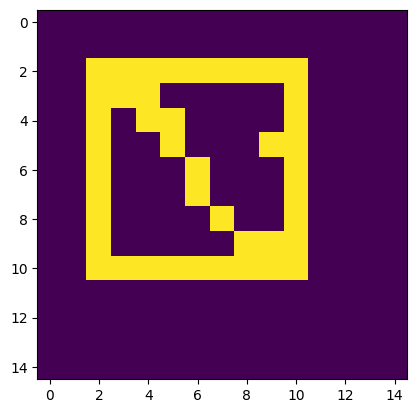

In [82]:
plt.imshow(grid)